In [15]:
import pandas as pd                                              # Importing pandas library with an alias pd
import matplotlib.pyplot as plt                                  # Importing matplotlib for visualization of plots and graphs
import seaborn as sns
import numpy as np                                               # importing numpy for doing mathematical operations on arrays
from scipy.stats import pearsonr                                 # Importing pearsonr function from Scipy.stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet        # Importing Ridge, Lasso, and ElasticNet classes from Scikit-learn library
from sklearn.feature_selection import f_regression               # Importing f_regression function from Scikit-learn library
from scipy.stats import ttest_ind                                # Importing ttest_ind for calculating the overall p value of the model
import statsmodels.api as sm                                     # Importing statsmodels.api module with an alias sm

In [16]:
# Loading the dataset as pandas dataframe
df = pd.read_excel('MPIAssignment_original.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


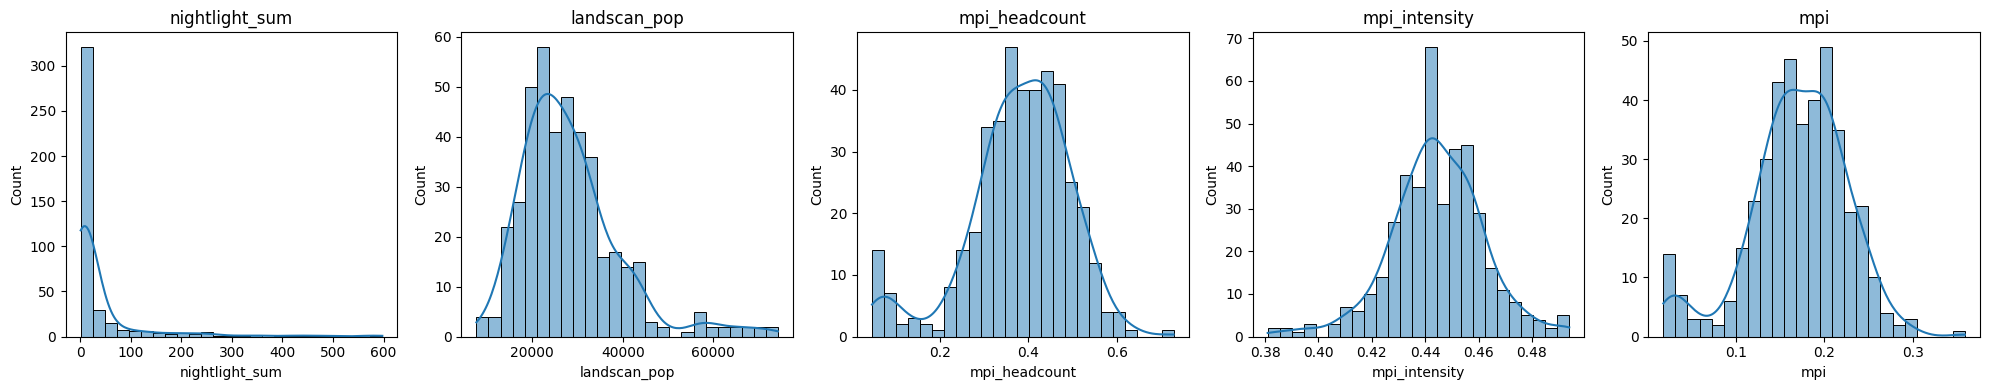

In [17]:
# Plotting histograms of all variables

# We create a single row of five subplots with a fixed size of 20 by 4. Then we iterate through five columns of a dataframe and 
# create a histogram using seaborn with 25 bins and a density curve. The tight_layout() function optimizes the layout of the subplots
# to minimize overlapping elements, and the show() function displays the plots

fig, axs = plt.subplots(ncols=5, figsize=(20, 4))
axs = axs.flatten()
for i, col in enumerate(['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity', 'mpi']):
    sns.histplot(df[col], ax=axs[i], bins=25, kde=True)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

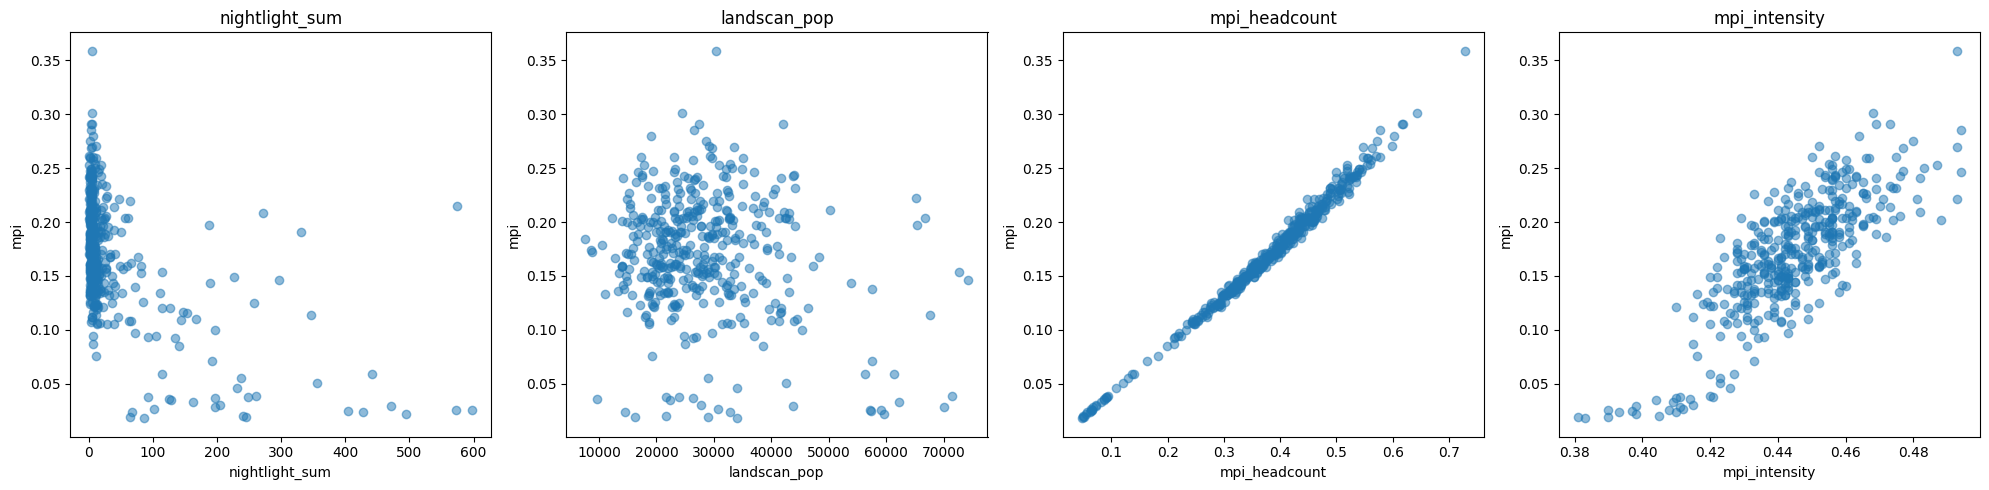

In [18]:
# Here we create a row of four subplots with a fixed size of 20 by 5. Then we iterate iterates through four columns of a dataframe 
# and creates a scatter plot. We have set the alpha parameter as 0.5 this sets transparency of the points. We have used the tight_layout() function 
# to optimize the layout of the subplots to minimize overlapping elements, and the show() function displays the plots
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))
for i, col in enumerate(['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity']):
    axs[i].scatter(df[col], df['mpi'], alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_title(col)
    axs[i].set_ylabel('mpi')
plt.tight_layout()
plt.show()

In [19]:
# Calculating the correlations for each feature
correlations = []
for col in ['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity']:
    x = df[col]
    y = df['mpi']
    log_x = np.log(x)
    log_y = np.log(y)
    correlations.append([
        pearsonr(x, y)[0],
        pearsonr(log_x, y)[0],
        pearsonr(x, log_y)[0],
        pearsonr(log_x, log_y)[0]
    ])

# Creating a table of the correlations
corr_table = pd.DataFrame(correlations, columns=['X vs y', 'log X vs y', 'X vs log y', 'log X vs log y'], index=['nightlight_sum', 'landscan_pop', 'mpi_headcount', 'mpi_intensity'])
print(corr_table)


                  X vs y  log X vs y  X vs log y  log X vs log y
nightlight_sum -0.528349   -0.575816   -0.638927       -0.617078
landscan_pop   -0.172782   -0.113587   -0.223342       -0.160110
mpi_headcount   0.995378    0.922131    0.942200        0.998507
mpi_intensity   0.799883    0.803473    0.769113        0.781876


In [20]:
# Here we are calculating nightlight per capita for each row in the dataframe by dividing the total nightlight sum by the population estimate obtained from the Landsat dataset
# Here we are calculateing the population density for each row in the dataframe by dividing the population estimate by the area of the region
df['nightlight_per_capita'] = df['nightlight_sum'] / df['landscan_pop']
df['population_density'] = df['landscan_pop'] / df['AREA']

# Printing the updated dataframe
print(df)

     FID  Prov_ID          Province  Dist_ID    District  Sect_ID      Sector  \
0      0        1       Kigali City       11  Nyarugenge     1101      Gitega   
1      1        1       Kigali City       11  Nyarugenge     1102    Kanyinya   
2      2        1       Kigali City       11  Nyarugenge     1103      Kigali   
3      3        1       Kigali City       11  Nyarugenge     1104  Kimisagara   
4      4        1       Kigali City       11  Nyarugenge     1105  Mageregere   
..   ...      ...               ...      ...         ...      ...         ...   
411  411        5  Eastern Province       57    Bugesera     5711  Nyarugenge   
412  412        5  Eastern Province       57    Bugesera     5712      Rilima   
413  413        5  Eastern Province       57    Bugesera     5713      Ruhuha   
414  414        5  Eastern Province       57    Bugesera     5714       Rweru   
415  415        5  Eastern Province       57    Bugesera     5715      Shyara   

         AREA  nightlight_s

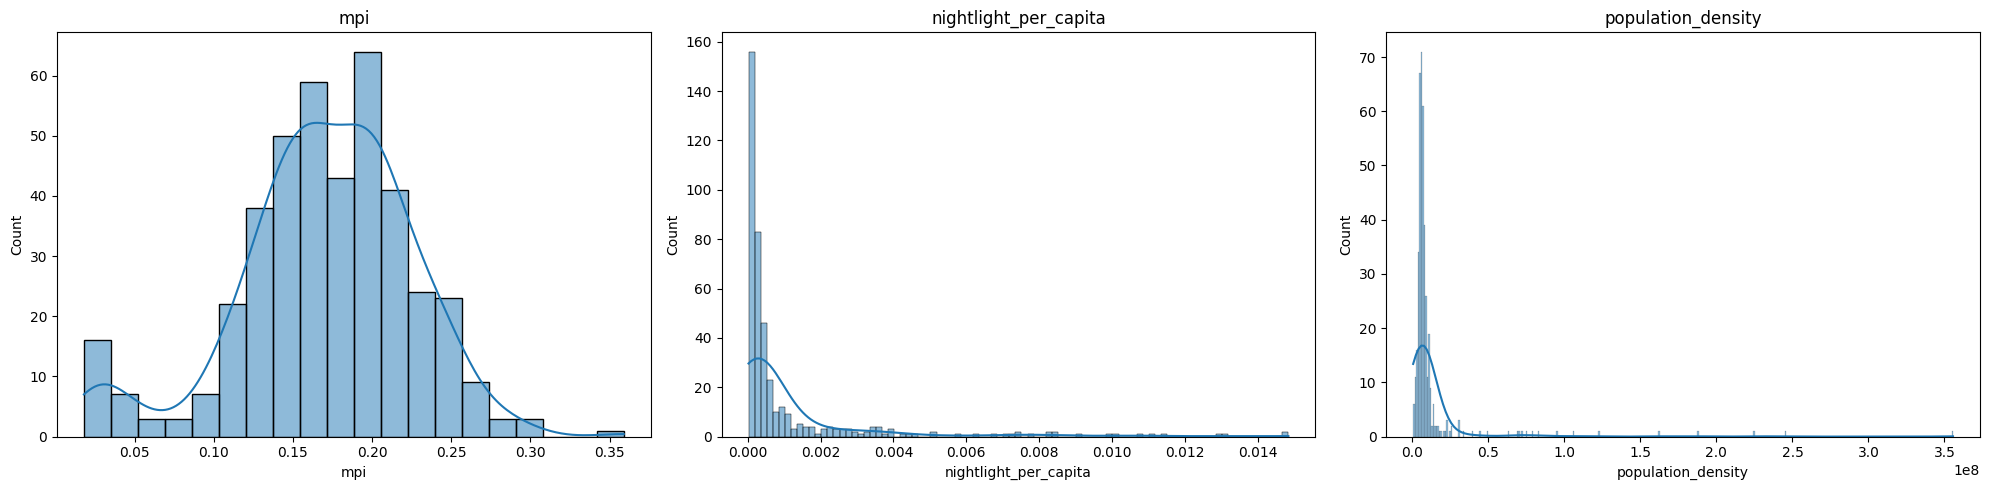

In [21]:
# We create a single row of three subplots with a fixed size of 20 by 5. We then iterate through three columns of a dataframe and create a histogram using seaborn's 
# histplot function with a kernel density estimate (KDE) curve. We used the show() function to display the plots
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
for i, col in enumerate(['mpi', 'nightlight_per_capita', 'population_density']):
    sns.histplot(df[col], ax=axs[i], kde=True)
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

In [22]:
# Here we create an empty list called and loop through three columns of the dataframe: 'mpi', 'nightlight_per_capita', and 'population_density'. 
# For each column, we compute the Pearson's correlation coefficient between the column and the 'mpi' column, as well as the correlation between the logarithm of each variable and the 'mpi' column. 
# The correlations are then appended to the 'correlations' list as a list of four values

correlations = []
for col in ['mpi', 'nightlight_per_capita', 'population_density']:
    x = df[col]
    y = df['mpi']
    log_x = np.log(x)
    log_y = np.log(y)
    correlations.append([
        pearsonr(x, y)[0],
        pearsonr(log_x, y)[0],
        pearsonr(x, log_y)[0],
        pearsonr(log_x, log_y)[0]
    ])

# Creating a table of the correlations
corr_table = pd.DataFrame(correlations, columns=['X vs y', 'log X vs y', 'X vs log y', 'log X vs log y'], index=['mpi', 'nightlight_per_capita', 'population_density'])
print(corr_table)

                         X vs y  log X vs y  X vs log y  log X vs log y
mpi                    1.000000    0.930019    0.930019        1.000000
nightlight_per_capita -0.546978   -0.605358   -0.660497       -0.638304
population_density    -0.487136   -0.617437   -0.668281       -0.745331


In [23]:
# X = np.log(df[['nightlight_per_capita', 'population_density']])

# Here we are concatinating the dataframes accordng to the previously found variables with the maximum correlation score. We are making the mpi values as the target
# values and the feature values as the x values
X = df[['nightlight_per_capita', 'population_density']]
X_ = df[['nightlight_per_capita']]
X__ = df[['nightlight_per_capita', 'population_density']].copy()
X_1 = np.log(X__['population_density'])
X = pd.concat([X_, X_1], axis=1)
X.head()

y = np.log(df['mpi'])

In [24]:
# Here we define a function called backward_regression that performs a backward stepwise regression to select the most significant features in a linear regression model. 
# The function takes three parameters: X, y, and a threshold value, which is the threshold p-value for removing a feature from the model. 
# We use a the statsmodels library to fit an OLS regression model with a constant term and then iteratively removes the least significant feature until all remaining features 
# have p-values below the specified threshold. We then print the p-values for each included feature and the overall p-value of the model. After that we return a list of the included features. 

def backward_regression(X, y, threshold_out, verbose=False):
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    
    # Calculate p-values for each feature
    print('Backward Stepwise Regression')
    print('P-values:')
    for i, feature in enumerate(included):
        print(f'{feature}: {model.pvalues[i+1]}')
    
    # Calculate predicted values
    y_pred = model.predict(sm.add_constant(X[included]))
    
    # Calculate p-value for the overall model
    t_stat, p_val = ttest_ind(y, y_pred)
    
    # Print p-value for the overall model
    print(f'Overall p-value: {p_val:.3f}')
    
    return included

included = backward_regression(X, y, 0.05, verbose=True)
print('Included features:', included)


Backward Stepwise Regression
P-values:
nightlight_per_capita: 8.738206186363213e-38
population_density: 3.5319105179816703e-59
Overall p-value: 1.000
Included features: ['nightlight_per_capita', 'population_density']


In [27]:
# Here we define a dictionary that contains Ridge Regression and Elastic Nets. We then loop through each model and fit it to the dataset and dependent variable.
# For each model, we used the f_regression to perform feature selection and get the p-values of. Then we print the p-values of each feature and the overall p-value 
# of the model, which is calculated using the ttest_ind function.

models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Elastic Nets': ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# Test each model
for name, model in models.items():
    # Fit the model
    model.fit(X, y)
    
    # Perform feature selection using f_regression
    f_vals, p_vals = f_regression(X, y)
    
    # Print the p-values of each feature
    print(f'{name} ')
    print('P-values:')
    for i, feature in enumerate(['nightlight_per_capita', 'population_density']):
        p_val = p_vals[i]
        print(f'{feature}: {p_val:.3f}')
        
    # Print the overall p-value of the model
    y_pred = model.predict(X)
    overall_p_val = ttest_ind(y, y_pred)[1]
    print(f'Overall p-value: {overall_p_val:.3f}')


Ridge Regression 
P-values:
nightlight_per_capita: 0.000
population_density: 0.000
Overall p-value: 1.000
Elastic Nets 
P-values:
nightlight_per_capita: 0.000
population_density: 0.000
Overall p-value: 1.000


<ipython-input-27-50c302cb874d>:27: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  overall_p_val = ttest_ind(y, y_pred)[1]


In [14]:
# Here we fit a Lasso regression model to X and y using cross-validation. We then calculate the predicted values for y using the fitted model and compute the correlation 
# coefficient between the predicted and actual values. We then calculate the R-squared value for the model. Then we print the estimated MPI values for each sector.

from sklearn.linear_model import LassoCV

model = LassoCV(cv=5).fit(X, y)

# Calculating predicted values
y_pred = model.predict(X)

# Calculating correlation between y_pred and y
corr = np.corrcoef(y, y_pred)[0,1]
print(f'Correlation: {corr:.3f}')

# Calculating R-squared
rsquared = model.score(X, y)
print(f'R-squared: {rsquared:.3f}')

est_mpi = (y_pred)
print('Estimated MPI:')
print(est_mpi)
# length = len(est_mpi)
# print(length)


Correlation: 0.791
R-squared: 0.624
Estimated MPI:
[-3.65118283 -2.10056918 -2.15095174 -3.42968748 -1.75377127 -3.19734527
 -2.95897484 -2.62041454 -3.47176161 -3.38389922 -2.10634725 -2.78338265
 -1.82687076 -3.11924273 -2.19853713 -2.0562278  -3.26996041 -3.22253989
 -3.0088006  -2.66131755 -2.32662228 -1.79362092 -3.12642081 -2.08751791
 -1.82189971 -2.10855177 -2.64577635 -3.16137866 -2.47159141 -2.32614032
 -3.46647818 -2.76956981 -2.02442962 -3.05200439 -2.89255211 -2.09082513
 -1.7840471  -1.67872824 -1.71434445 -1.84430833 -1.94197952 -1.75871723
 -1.77166966 -1.67831749 -1.6747864  -1.7801033  -1.70942092 -1.72497805
 -1.91762494 -1.81909833 -1.77635166 -1.75851212 -1.74334843 -1.82125099
 -1.79460531 -1.76784305 -1.7226332  -2.01195582 -1.72124037 -1.76755578
 -1.60574643 -1.18777345 -1.40672962 -1.32298215 -1.66545734 -1.6829002
 -1.8315923  -1.22457601 -1.78761016 -1.57449867 -1.74963216 -1.68847949
 -1.65966619 -1.81170949 -1.63426375 -1.84323096 -1.76848176 -1.69825378
 